In [1]:
import json
import os
import numpy as np
from matplotlib import pyplot as plt

### Setup

In [2]:
results_dir = 'results'

### Load data

In [3]:
results_dict = json.loads(open(os.path.join(results_dir, 'all.json')).read())

In [4]:
results_dict

{'50': {'PCA': [3.9103989601135254, 3.2496941089630127, 2.9362218379974365],
  'N-FINDR + FCLS': [7.95487380027771, 7.9459638595581055, 8.407137155532837],
  'VCA + FCLS': [6.49304723739624, 6.3565590381622314, 6.2016801834106445],
  'Dense AE': [0.8203849792480469, 0.650378942489624, 0.7507109642028809],
  'Convolutional AE': [3.483901023864746,
   3.3703179359436035,
   3.506385087966919],
  'Transformer AE': [1.2073240280151367,
   1.1543381214141846,
   1.1361000537872314],
  'Convolutional Transformer AE': [3.9220821857452393,
   3.8871729373931885,
   3.9897069931030273]},
 '100': {'PCA': [4.577322959899902, 4.101262092590332, 3.8216400146484375],
  'N-FINDR + FCLS': [22.287916660308838,
   22.320061206817627,
   22.305307149887085],
  'VCA + FCLS': [19.87698984146118, 20.08545207977295, 20.1616051197052],
  'Dense AE': [2.1985442638397217, 2.0914297103881836, 1.9882431030273438],
  'Convolutional AE': [13.767372846603394,
   13.55117917060852,
   12.840575933456421],
  'Transfor

### Plotting method

In [22]:
colors = ['black', 'orangered', 'lime', 'slategrey', 'purple', 'teal', 'royalblue']

def plot_results(results, save_to=None):
    fig, ax = plt.subplots(figsize=(6, 3.5))

    # Plot means
    model_means = {}
    model_colors = {}
    for image_size, data in results.items():
        for i, (model, model_times) in enumerate(data.items()):

            if model == 'PCA':
                continue

            # Calculate mean and standard deviation
            times_mean = np.mean(model_times)
            times_std = np.std(model_times)

            num_spectra = int(image_size)**2

            ax.errorbar(num_spectra, times_mean, yerr=times_std, color=colors[i], capsize=3)

            ax.plot(num_spectra, times_mean, 'o', color=colors[i])

            if model not in model_means:
                model_means[model] = [[num_spectra, times_mean]]
            else:
                model_means[model].append([num_spectra, times_mean])

            model_colors[model] = colors[i]

    # Plot lines connecting means
    for j, (model, means) in enumerate(model_means.items()):
        means = sorted(means, key=lambda x: x[0])

        if 'VCA' in model or 'N-FINDR' in model or 'PCA' in model:
            linestyle = '--'
        else:
            linestyle = '-'

        for i in range(len(means)-1):
            x1, y1 = means[i]
            x2, y2 = means[i+1]
            ax.plot([x1, x2], [y1, y2], color=model_colors[model], linestyle=linestyle, label=model)

    # Set plot labels and title
    ax.set_xlabel('Number of spectra')
    ax.set_ylabel('Wall time (s)')

    # Make plot look nice
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_tick_params(direction='out')
    ax.yaxis.set_tick_params(direction='out')

    # Legend with only unique entries
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    if save_to is not None:
        fig.savefig(save_to, dpi=600, bbox_inches='tight')

    plt.show()

### Plot data

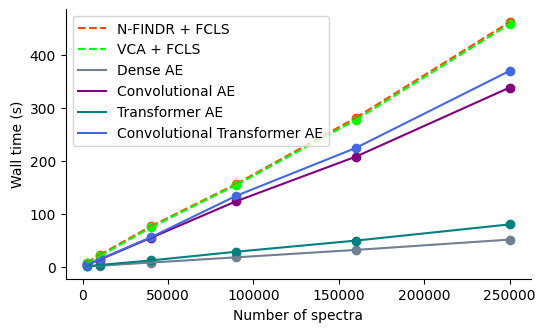

In [23]:
plot_results(results_dict, save_to='result.png')